## 2020 Workouts. 
### Workouts in the afternoons! 

Story:
- Bike with my family around our city! We decided to go biking and enjoy as a family. It's a lot fun! We had a great time, took pictures of the sunset, animals (iguanas, frogs, and birds), discovered new trails, roads and enjoy life. My daughter fell off the bike a couple of times (She is ok no broken bones only few bruises. She is brave and we got back to bike the next day). She is not giving up... She is becoming a professional biker (hahaha). My wife was tired the first mile, but she finished the goal. Our son did not want to come with us; he wanted to play video games. He had come a couple of times. We have been having an amazing family time and we will continue to improve our scores!

Inputs:
- DistanceMiles: Biking distance in miles
- Calor: Calories 
- Total Calories: Total calories
- AvgSpeedmph: Average speed in mph
- TotalAscent: Total Ascent
- TotalDescent: Total Descent
- ElevationGainft: Elevation
- Exercise: Cycling or Dog Walking 
- GoalMiles: Set goal in miles on my phone
- GoalReached: Goal reached yer or no
- CyclingMessage: Samsung app message on bike completion

Outputs: 
* **Goal reached = Yes or No**
* **Target = Yes (1) and No (0)**

# Perform Logistic Regression

### Logistic Regression is the appropiate regression analysis to conduct when the dependent variable is binary. 
### Logistic Regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables. 
### Binary Logistic regression (number of categories are 2, pass or fail, yes or no)

### Import Libraries 

In [1]:
# Libraries
import numpy as np                # Data Statistical analysis
import pandas as pd               # Data  analysis, manipulation and exploring 
import seaborn as sns             # Statistical Data Vizualization. Visualize the data and explore various aspects of the data in a graphical format 
import matplotlib.pyplot as plt   # Data Visualization (Plotting library)
%matplotlib inline 
sns.set(style="white")

# PYCARET machine learning in Python
from pycaret.classification import *
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Import Dataset

In [2]:
# Read the dataset using pandas dataframe
workout = pd.read_csv('Workout.csv')

In [3]:
# View the first 5 rows
workout.head()

,Time,TotalDuration,DistanceMiles,Calor,TotalCalories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft,StartTime,EndTime,Date,Exercise,GoalMiles,GoalReached,CyclingMessage
0,0:42:37,0:43:18,6.19,271,271,8.7,18.9,0.83,0.81,723,19:57,20:40,6/29/2020,Cycling,5,yes,Awesome! You broke your longest distance recor...
1,0:23:41,0:28:26,3.44,156,161,8.8,18.2,0.79,0.89,636,19:28,19:56,7/1/2020,Cycling,5,no,Fantastic! You broke your best pace record
2,0:52:25,0:59:17,6.60,285,292,7.5,11.3,0.58,0.50,428,20:10,21:09,7/6/2020,Cycling,5,yes,Amazing! You broke your duration record. Your ...
3,1:06:25,1:10:25,9.44,411,425,9.1,14.0,1.20,1.57,1105,20:07,21:32,7/7/2020,Cycling,5,yes,Fantastic! You broke your best pace record
4,0:56:00,0:59:00,6.68,285,298,8.9,13.8,0.95,0.91,810,20:28,21:23,7/8/2020,Cycling,5,yes,You dit it! You reached your distance target


In [4]:
# View the last 5 rows
workout.tail()

,Time,TotalDuration,DistanceMiles,Calor,TotalCalories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft,StartTime,EndTime,Date,Exercise,GoalMiles,GoalReached,CyclingMessage
7,0:10:05,0:12:15,0.41,65,67,2.4,4.6,0.10,0.12,57,15:34,15:47,7/17/2020,Dog Walking,1,no,Way to go!
8,0:42:43,0:48:40,6.39,278,284,8.9,16.0,0.85,0.91,665,20:11,20:59,7/20/2020,Cycling,5,yes,Great! You have made it to 62.13 mi once You d...
9,0:13:26,0:26:49,2.13,92,107,9.5,11.4,0.16,0.10,111,18:32,18:59,7/22/2020,Cycling,5,no,Fantastic! You broke your best pace record. Yo...
10,0:13:20,0:20:05,2.55,117,124,11.5,16.8,0.64,0.69,970,18:10,18:30,7/23/2020,Cycling,2,yes,You reached your distance target of 2 miles. B...
11,0:52:57,1:08:45,7.76,339,357,8.7,15.5,1.20,1.42,1408,19:26,20:35,7/27/2020,Cycling,5,yes,You dit it! You reached your distance target


In [5]:
# View Statistical details. Shows statistics for every numerical column in the dataset
workout.describe()

,DistanceMiles,Calor,TotalCalories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft,GoalMiles
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,5.893333,268.333333,278.500000,8.425000,14.766667,1.125000,1.149167,1128.333333,5.250000
std,3.112866,138.235197,142.109113,2.115796,4.523742,0.999313,0.952017,1101.649039,2.598076
min,0.410000,65.000000,67.000000,2.400000,4.600000,0.100000,0.100000,57.000000,1.000000
25%,3.217500,146.250000,151.750000,8.575000,13.200000,0.625000,0.642500,584.000000,5.000000
50%,6.495000,281.500000,288.000000,8.850000,14.800000,0.840000,0.900000,766.500000,5.000000
75%,8.065000,357.000000,374.000000,8.950000,17.150000,1.200000,1.457500,1180.750000,5.000000
max,10.150000,495.000000,513.000000,11.500000,22.600000,3.520000,3.290000,3701.000000,10.000000


In [6]:
# Shows the rows count and the types. Print summary of the dataframe. There are none null elements.  
workout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             12 non-null     object 
 1   TotalDuration    12 non-null     object 
 2   DistanceMiles    12 non-null     float64
 3   Calor            12 non-null     int64  
 4   TotalCalories    12 non-null     int64  
 5   AvgSpeedmph      12 non-null     float64
 6   MaxSpeedmph      12 non-null     float64
 7   TotalAscent      12 non-null     float64
 8   TotalDescent     12 non-null     float64
 9   ElevationGainft  12 non-null     int64  
 10  StartTime        12 non-null     object 
 11  EndTime          12 non-null     object 
 12  Date             12 non-null     object 
 13  Exercise         12 non-null     object 
 14  GoalMiles        12 non-null     int64  
 15  GoalReached      12 non-null     object 
 16  CyclingMessage   12 non-null     object 
dtypes: float64(5), int

In [7]:
# Number of columns or features in the dataset
workout.columns

Index(['Time', 'TotalDuration', 'DistanceMiles', 'Calor', 'TotalCalories',
       'AvgSpeedmph', 'MaxSpeedmph', 'TotalAscent', 'TotalDescent ',
       'ElevationGainft', 'StartTime', 'EndTime', 'Date', 'Exercise',
       'GoalMiles', 'GoalReached', 'CyclingMessage'],
      dtype='object')

### Explore and Visualize Data (EDA)

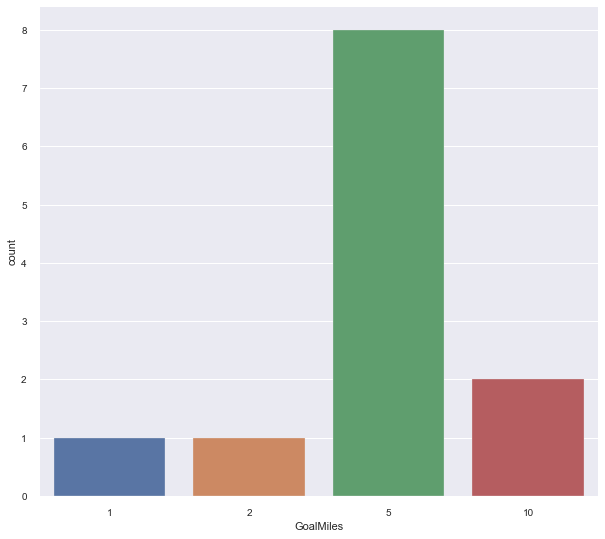

In [8]:
# Count Goal miles column (1, 5, and 10). The highest goal in miles is 5.
# Samsung Health app I've selected my goal at the start of every workout. 

plt.figure(figsize = (10,9))
sns.countplot(workout['GoalMiles'], label = 'Count')

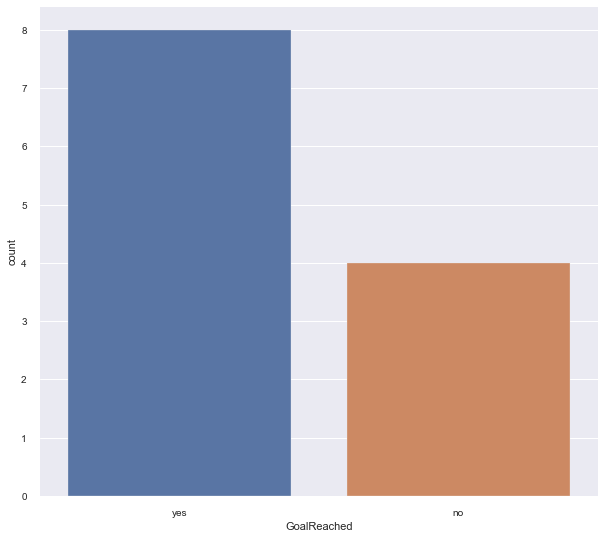

In [9]:
# Count Goal reached column (yes or no). Reached my goal 8 times and failed 4 times. 

plt.figure(figsize = (10,9))
sns.countplot(workout['GoalReached'], label = 'Count')

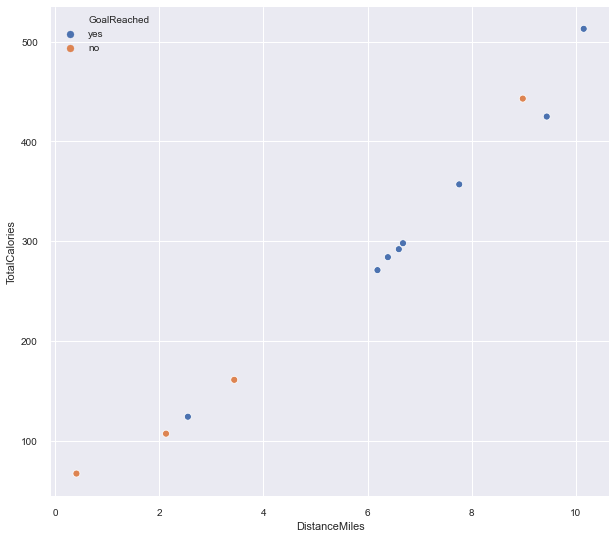

In [10]:
# Distance miles and Total calories are correlated. 
plt.figure(figsize = (10,9))
sns.scatterplot(x = 'DistanceMiles', y = 'TotalCalories', hue = 'GoalReached', data = workout)

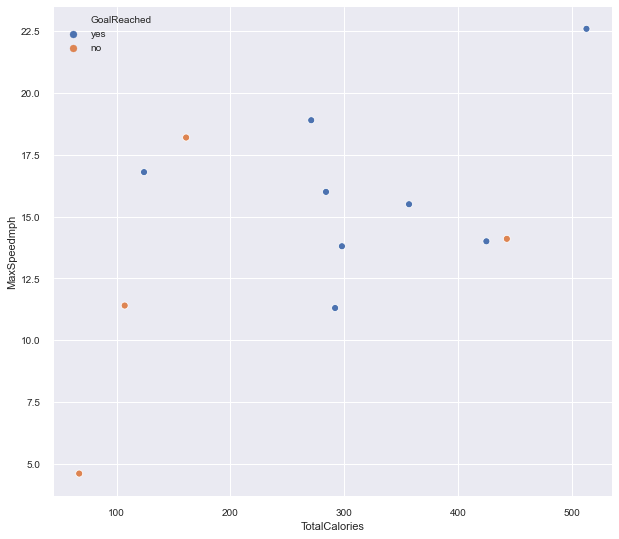

In [11]:
# Total calories vs. Max Speed mph
plt.figure(figsize = (10,9))
sns.scatterplot(x = 'TotalCalories', y = 'MaxSpeedmph', hue = 'GoalReached', data = workout)

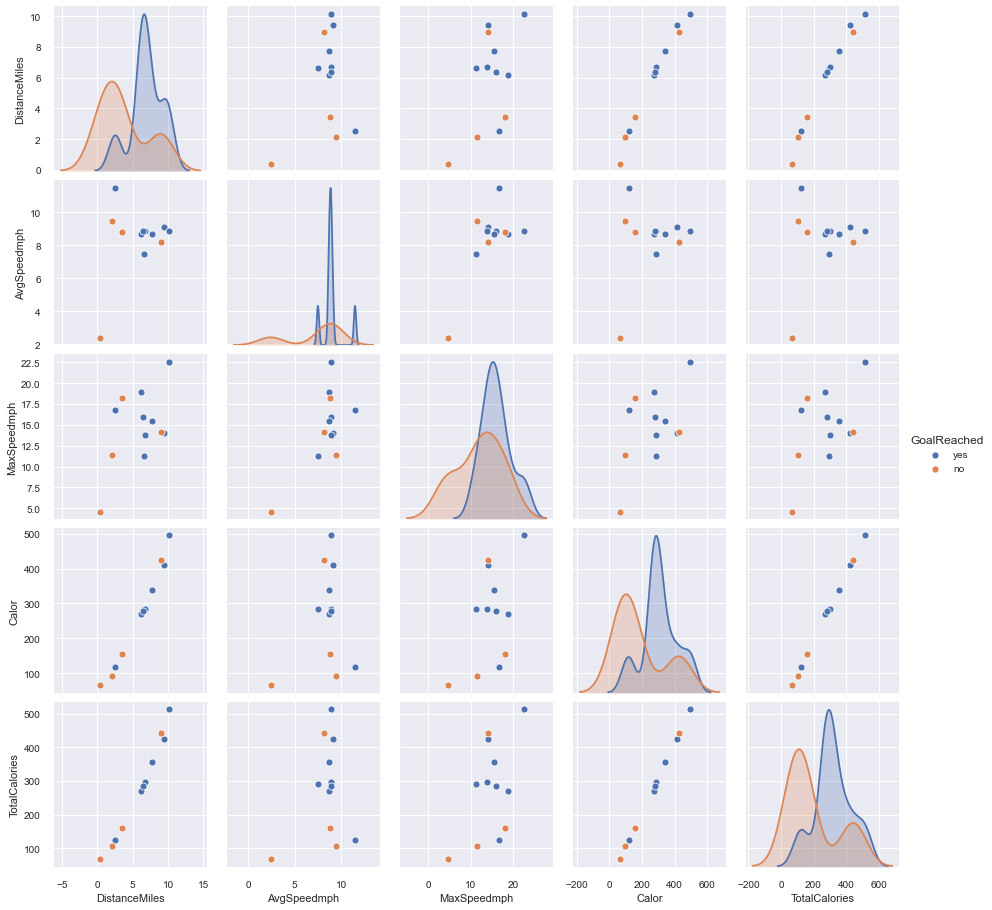

In [12]:
sns.pairplot(workout, hue = 'GoalReached', vars = ['DistanceMiles', 'AvgSpeedmph', 'MaxSpeedmph', 'Calor', 'TotalCalories'])

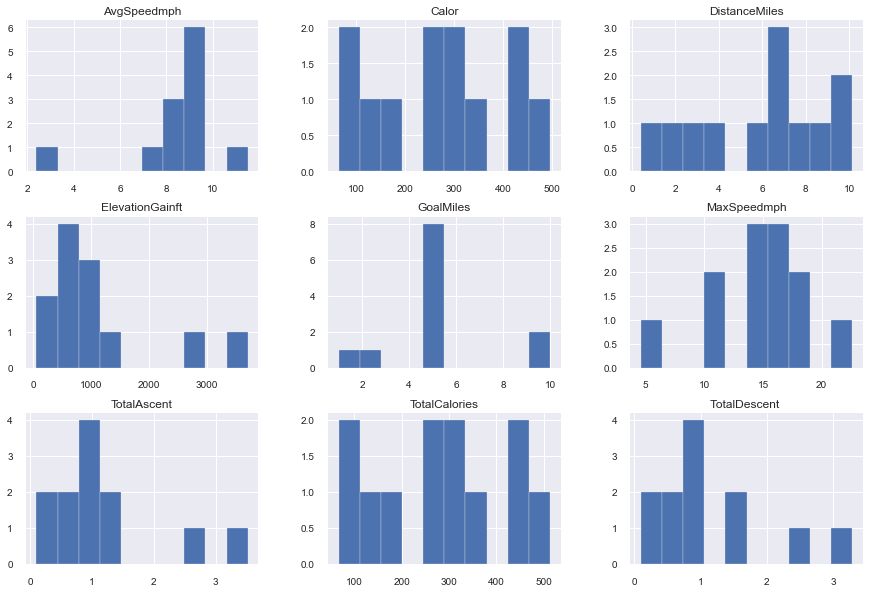

In [13]:
# Plot each of these features. Histogram - Representation of numerical data
workout.hist(figsize = (15,10))
plt.show()

In [14]:
# Pycaret and profile report for the entire dataset 
w = ProfileReport(workout)
w

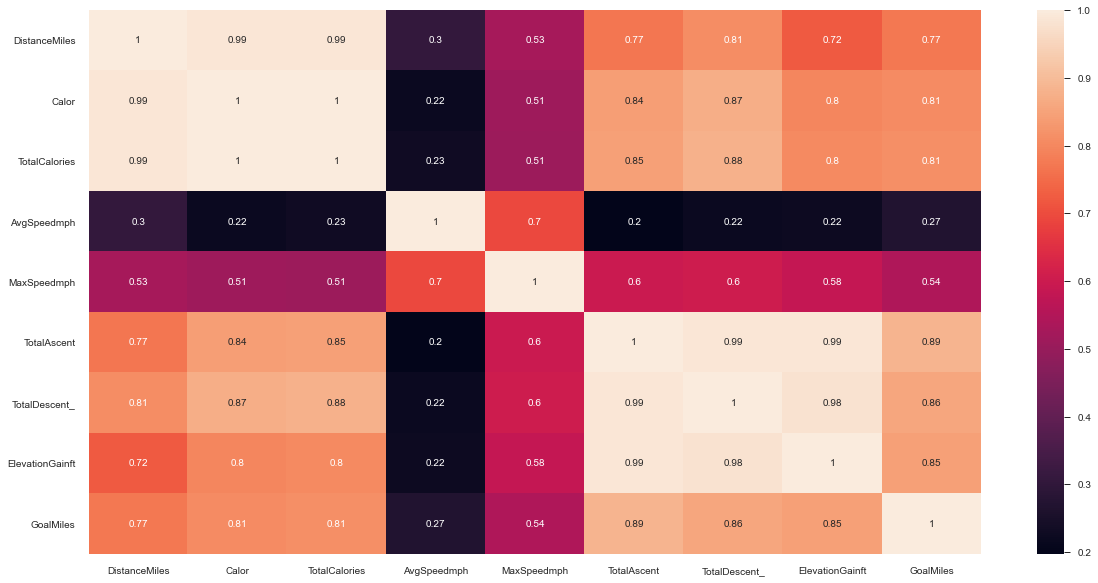

In [15]:
# Heatmap - represents the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.
# annot – an array of same shape as data which is used to annotate the heatmap. cmap – a matplotlib colormap name or object. This maps the data values to the color space.

plt.figure(figsize = (20, 10))
sns.heatmap(workout.corr(), annot=True)

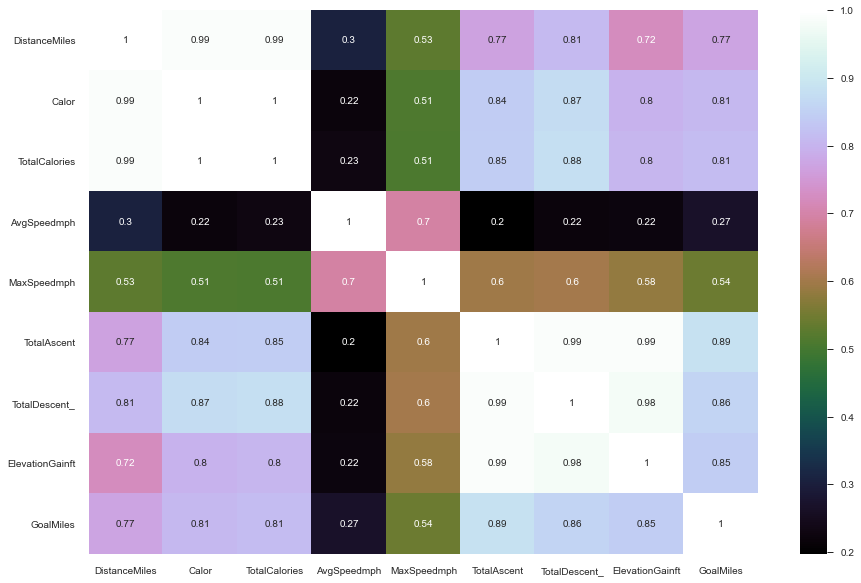

In [16]:
# Heatmaps visualize the data and represent in the form of a summary through the graph/colored maps.

plt.figure(figsize = (15, 10))
sns.heatmap(workout.corr(), annot=True, cmap = "cubehelix")

In [17]:
# Replace GoalReached (yes and no) column into 0 and 1

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
workout['GoalReached'] = LabelEncoder_y.fit_transform(workout['GoalReached'])

In [18]:
workout.head()

,Time,TotalDuration,DistanceMiles,Calor,TotalCalories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent_,ElevationGainft,StartTime,EndTime,Date,Exercise,GoalMiles,GoalReached,CyclingMessage
0,0:42:37,0:43:18,6.19,271,271,8.7,18.9,0.83,0.81,723,19:57,20:40,6/29/2020,Cycling,5,1,Awesome! You broke your longest distance recor...
1,0:23:41,0:28:26,3.44,156,161,8.8,18.2,0.79,0.89,636,19:28,19:56,7/1/2020,Cycling,5,0,Fantastic! You broke your best pace record
2,0:52:25,0:59:17,6.60,285,292,7.5,11.3,0.58,0.50,428,20:10,21:09,7/6/2020,Cycling,5,1,Amazing! You broke your duration record. Your ...
3,1:06:25,1:10:25,9.44,411,425,9.1,14.0,1.20,1.57,1105,20:07,21:32,7/7/2020,Cycling,5,1,Fantastic! You broke your best pace record
4,0:56:00,0:59:00,6.68,285,298,8.9,13.8,0.95,0.91,810,20:28,21:23,7/8/2020,Cycling,5,1,You dit it! You reached your distance target


In [19]:
# View column GoalReached = 0 (No)
workout_no = workout[workout['GoalReached'] == 0]
workout_no.head()

,Time,TotalDuration,DistanceMiles,Calor,TotalCalories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent_,ElevationGainft,StartTime,EndTime,Date,Exercise,GoalMiles,GoalReached,CyclingMessage
1,0:23:41,0:28:26,3.44,156,161,8.8,18.2,0.79,0.89,636,19:28,19:56,7/1/2020,Cycling,5,0,Fantastic! You broke your best pace record
6,1:05:38,1:20:35,8.98,426,443,8.2,14.1,2.68,2.58,2926,19:31,20:52,7/10/2020,Cycling,10,0,Great Cycling! You broke your burned calorie r...
7,0:10:05,0:12:15,0.41,65,67,2.4,4.6,0.10,0.12,57,15:34,15:47,7/17/2020,Dog Walking,1,0,Way to go!
9,0:13:26,0:26:49,2.13,92,107,9.5,11.4,0.16,0.10,111,18:32,18:59,7/22/2020,Cycling,5,0,Fantastic! You broke your best pace record. Yo...


In [20]:
# View column GoalReached = 1 (Yes)
workout_yes = workout[workout['GoalReached'] == 1]
workout_yes.head()

,Time,TotalDuration,DistanceMiles,Calor,TotalCalories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent_,ElevationGainft,StartTime,EndTime,Date,Exercise,GoalMiles,GoalReached,CyclingMessage
0,0:42:37,0:43:18,6.19,271,271,8.7,18.9,0.83,0.81,723,19:57,20:40,6/29/2020,Cycling,5,1,Awesome! You broke your longest distance recor...
2,0:52:25,0:59:17,6.60,285,292,7.5,11.3,0.58,0.50,428,20:10,21:09,7/6/2020,Cycling,5,1,Amazing! You broke your duration record. Your ...
3,1:06:25,1:10:25,9.44,411,425,9.1,14.0,1.20,1.57,1105,20:07,21:32,7/7/2020,Cycling,5,1,Fantastic! You broke your best pace record
4,0:56:00,0:59:00,6.68,285,298,8.9,13.8,0.95,0.91,810,20:28,21:23,7/8/2020,Cycling,5,1,You dit it! You reached your distance target
5,1:08:04,1:24:33,10.15,495,513,8.9,22.6,3.52,3.29,3701,19:56,21:20,7/9/2020,Cycling,10,1,Awesome! You broke your longest distance recor...


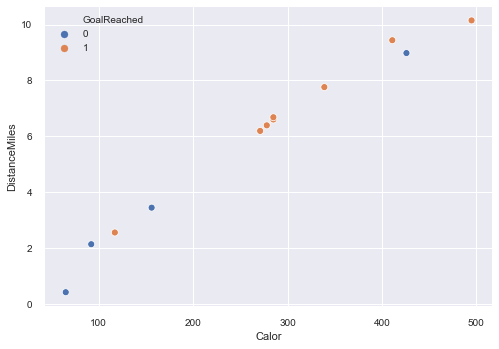

In [21]:
sns.scatterplot(workout['Calor'], workout['DistanceMiles'], hue = workout['GoalReached'])

### Testing, Training dataset and data cleaning

In [22]:
# Drop columns 
workout.drop(['Time', 'TotalDuration', 'StartTime', 'EndTime', 'Date', 'CyclingMessage', 'Exercise', 'CyclingMessage'], axis=1, inplace=True)

In [23]:
workout

,DistanceMiles,Calor,TotalCalories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent_,ElevationGainft,GoalMiles,GoalReached
0,6.19,271,271,8.7,18.9,0.83,0.81,723,5,1
1,3.44,156,161,8.8,18.2,0.79,0.89,636,5,0
2,6.60,285,292,7.5,11.3,0.58,0.50,428,5,1
3,9.44,411,425,9.1,14.0,1.20,1.57,1105,5,1
4,6.68,285,298,8.9,13.8,0.95,0.91,810,5,1
5,10.15,495,513,8.9,22.6,3.52,3.29,3701,10,1
6,8.98,426,443,8.2,14.1,2.68,2.58,2926,10,0
7,0.41,65,67,2.4,4.6,0.10,0.12,57,1,0
8,6.39,278,284,8.9,16.0,0.85,0.91,665,5,1
9,2.13,92,107,9.5,11.4,0.16,0.10,111,5,0


In [24]:
# Drop the target label (GoalReached Column) 
X = workout.drop(['GoalReached'], axis = 1).values
X

array([[6.190e+00, 2.710e+02, 2.710e+02, 8.700e+00, 1.890e+01, 8.300e-01,
        8.100e-01, 7.230e+02, 5.000e+00],
       [3.440e+00, 1.560e+02, 1.610e+02, 8.800e+00, 1.820e+01, 7.900e-01,
        8.900e-01, 6.360e+02, 5.000e+00],
       [6.600e+00, 2.850e+02, 2.920e+02, 7.500e+00, 1.130e+01, 5.800e-01,
        5.000e-01, 4.280e+02, 5.000e+00],
       [9.440e+00, 4.110e+02, 4.250e+02, 9.100e+00, 1.400e+01, 1.200e+00,
        1.570e+00, 1.105e+03, 5.000e+00],
       [6.680e+00, 2.850e+02, 2.980e+02, 8.900e+00, 1.380e+01, 9.500e-01,
        9.100e-01, 8.100e+02, 5.000e+00],
       [1.015e+01, 4.950e+02, 5.130e+02, 8.900e+00, 2.260e+01, 3.520e+00,
        3.290e+00, 3.701e+03, 1.000e+01],
       [8.980e+00, 4.260e+02, 4.430e+02, 8.200e+00, 1.410e+01, 2.680e+00,
        2.580e+00, 2.926e+03, 1.000e+01],
       [4.100e-01, 6.500e+01, 6.700e+01, 2.400e+00, 4.600e+00, 1.000e-01,
        1.200e-01, 5.700e+01, 1.000e+00],
       [6.390e+00, 2.780e+02, 2.840e+02, 8.900e+00, 1.600e+01, 8.500e-01

In [25]:
X.shape

(12, 9)

In [26]:
# Output target class
y = workout['GoalReached'].values
y

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [27]:
y.shape

(12,)

In [28]:
# Feature Scaling - Normalize the data 
from sklearn.preprocessing import StandardScaler   
sc = StandardScaler()   # Object
X = sc.fit_transform(X) 

In [29]:
X

array([[ 0.09954115,  0.02014858, -0.0551231 ,  0.1357542 ,  0.95432626,
        -0.30832915, -0.37210279, -0.38429377, -0.10050378],
       [-0.82317173, -0.8487588 , -0.8635952 ,  0.18511936,  0.79270649,
        -0.35013649, -0.28433407, -0.46677787, -0.10050378],
       [ 0.23710925,  0.12592861,  0.09922158, -0.45662776, -0.80040267,
        -0.56962504, -0.71220656, -0.66398125, -0.10050378],
       [ 1.19002   ,  1.07794886,  1.07673784,  0.33321485, -0.17701213,
         0.07838877,  0.46170002, -0.02212217, -0.10050378],
       [ 0.2639518 ,  0.12592861,  0.14332005,  0.23448452, -0.22318921,
        -0.18290712, -0.26239189, -0.30180966, -0.10050378],
       [ 1.42824768,  1.71262904,  1.72351552,  0.23448452,  1.80860219,
         2.50321462,  2.34872742,  2.43912771,  1.90957185],
       [ 1.0356753 ,  1.19128461,  1.20903328, -0.11107162, -0.15392359,
         1.62526043,  1.56978006,  1.7043555 ,  1.90957185],
       [-1.83983355, -1.53632899, -1.55447135, -2.97425108, -2

### Training Model

In [30]:
# Divide data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [31]:
# Samples/data points for training
X_train.shape

(8, 9)

In [32]:
y_train.shape

(8,)

In [33]:
# Samples for testing 
X_test.shape

(4, 9)

In [34]:
y_test.shape

(4,)

In [35]:
# Train a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='liblinear')
# Apply fit method
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

### Model Testing 

In [36]:
# Use training dataset to perform the testing using the predict method to give y predictions
# Use training dataset on train classifier to get idea of what error we have during training only. 
y_predict_train = classifier.predict(X_train)

In [37]:
# Model prediction based on the inputs. Predictions from the model
y_predict_train

array([1, 1, 0, 0, 0, 1, 1, 1])

In [38]:
y_train

array([1, 1, 0, 0, 0, 1, 1, 1])

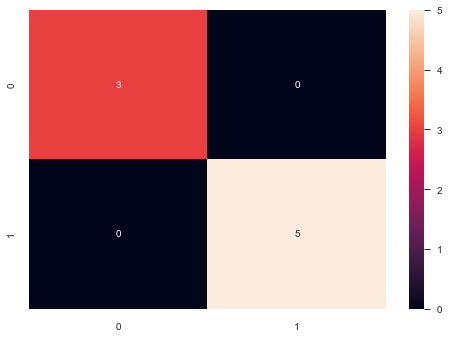

In [39]:
# y_train is the true value and y_predict_train is the model prediction
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True, fmt = 'd')

In [40]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 1, 1, 0])

In [41]:
# It happens in real life
y_test

array([0, 1, 1, 1])

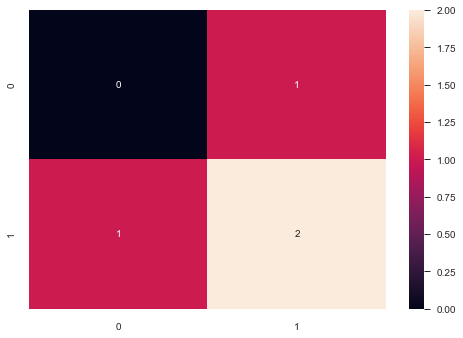

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [43]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4

